In [1]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

In [2]:
import glob
import os



In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf


In [4]:
# #da=os.path.join('D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# df = pd.read_csv(r'D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# #df = pd.read_csv(r'C:\Users\Ron\Desktop\products_sold.csv')
# print(df)

In [5]:
Circumferential = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Looped/Circumferential Crack', "*.csv"))

cir = pd.concat((pd.read_csv(f) for f in Circumferential),axis = 1, ignore_index=True)


Gasket = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Looped/Gasket Leak', "*.csv"))

gas = pd.concat((pd.read_csv(g) for g in Gasket),axis = 1, ignore_index=True)


Longitudinal = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Looped/Longitudinal Crack', "*.csv"))

long = pd.concat((pd.read_csv(k) for k in Longitudinal),axis = 1, ignore_index=True)


NonLeak = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Looped/NonLeak', "*.csv"))

non = pd.concat((pd.read_csv(l) for l  in NonLeak),axis = 1, ignore_index=True)


Orifice = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Looped/Orifice Leak', "*.csv"))

Ori = pd.concat((pd.read_csv(m) for m in Orifice),axis = 1, ignore_index=True)





In [6]:
cir

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,-0.004048,0.000000,0.000448,0.000000,-0.001985,0.000000,0.001902,0.000000,0.000434,0.000000,0.002971,0.000000,0.000096,0.000000,0.000845
1,0.000039,-0.003757,0.000039,0.000738,0.000039,-0.002336,0.000039,0.002192,0.000039,0.000805,0.000039,0.002711,0.000039,0.000125,0.000039,0.001215
2,0.000078,-0.003799,0.000078,0.000854,0.000078,-0.002058,0.000078,0.001746,0.000078,0.000888,0.000078,0.002224,0.000078,0.000123,0.000078,0.000598
3,0.000117,-0.003888,0.000117,0.000776,0.000117,-0.002015,0.000117,0.001561,0.000117,0.000925,0.000117,0.002976,0.000117,0.000139,0.000117,-0.001861
4,0.000156,-0.003481,0.000156,0.001063,0.000156,-0.001644,0.000156,0.001101,0.000156,0.001147,0.000156,0.003168,0.000156,0.000084,0.000156,-0.001567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995182,NaN,NaN,NaN,NaN,38.874297,0.001522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995183,NaN,NaN,NaN,NaN,38.874336,0.001566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995184,NaN,NaN,NaN,NaN,38.874375,0.002010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995185,NaN,NaN,NaN,NaN,38.874414,0.001921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cir = cir.drop(cir.columns[[0,2,4,6,8,10,12,14]],axis = 1)
cir

,1,3,5,7,9,11,13,15
0,-0.004048,0.000448,-0.001985,0.001902,0.000434,0.002971,0.000096,0.000845
1,-0.003757,0.000738,-0.002336,0.002192,0.000805,0.002711,0.000125,0.001215
2,-0.003799,0.000854,-0.002058,0.001746,0.000888,0.002224,0.000123,0.000598
3,-0.003888,0.000776,-0.002015,0.001561,0.000925,0.002976,0.000139,-0.001861
4,-0.003481,0.001063,-0.001644,0.001101,0.001147,0.003168,0.000084,-0.001567
...,...,...,...,...,...,...,...,...
995182,NaN,NaN,0.001522,NaN,NaN,NaN,NaN,NaN
995183,NaN,NaN,0.001566,NaN,NaN,NaN,NaN,NaN
995184,NaN,NaN,0.002010,NaN,NaN,NaN,NaN,NaN
995185,NaN,NaN,0.001921,NaN,NaN,NaN,NaN,NaN


In [8]:
cir
#cir=cir.iloc[0:1000]
cir.insert(8, "Label",'Circumferential', True)
cir

,1,3,5,7,9,11,13,15,Label
0,-0.004048,0.000448,-0.001985,0.001902,0.000434,0.002971,0.000096,0.000845,Circumferential
1,-0.003757,0.000738,-0.002336,0.002192,0.000805,0.002711,0.000125,0.001215,Circumferential
2,-0.003799,0.000854,-0.002058,0.001746,0.000888,0.002224,0.000123,0.000598,Circumferential
3,-0.003888,0.000776,-0.002015,0.001561,0.000925,0.002976,0.000139,-0.001861,Circumferential
4,-0.003481,0.001063,-0.001644,0.001101,0.001147,0.003168,0.000084,-0.001567,Circumferential
...,...,...,...,...,...,...,...,...,...
995182,NaN,NaN,0.001522,NaN,NaN,NaN,NaN,NaN,Circumferential
995183,NaN,NaN,0.001566,NaN,NaN,NaN,NaN,NaN,Circumferential
995184,NaN,NaN,0.002010,NaN,NaN,NaN,NaN,NaN,Circumferential
995185,NaN,NaN,0.001921,NaN,NaN,NaN,NaN,NaN,Circumferential


In [9]:
gas = gas.drop(gas.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#gas=gas.iloc[0:1000]

gas.insert(8, "Label",'Gasket', True)
gas

,1,3,5,7,9,11,13,15,Label
0,-0.000469,-0.002052,0.000537,-0.000655,0.000173,0.003526,0.000133,-0.001843,Gasket
1,-0.000304,-0.002155,0.000576,-0.000513,0.000134,0.003555,0.000186,-0.001691,Gasket
2,0.000156,-0.002202,0.000645,-0.000549,0.000137,0.003120,0.000222,-0.001686,Gasket
3,0.000505,-0.002093,0.000717,-0.000584,0.000100,0.002985,0.000212,-0.001811,Gasket
4,0.000062,-0.002012,0.000707,-0.000538,0.000149,0.002988,0.000229,-0.001621,Gasket
...,...,...,...,...,...,...,...,...,...
952146,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,NaN,Gasket
952147,NaN,NaN,NaN,NaN,NaN,NaN,0.000132,NaN,Gasket
952148,NaN,NaN,NaN,NaN,NaN,NaN,0.000150,NaN,Gasket
952149,NaN,NaN,NaN,NaN,NaN,NaN,0.000108,NaN,Gasket


In [10]:
long = long.drop(long.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#long=long.iloc[0:1000]

long.insert(8, "Label",'Longitudinal', True)
long

,1,3,5,7,9,11,13,15,Label
0,-0.003527,0.003299,0.000523,0.000832,0.000040,0.000879,0.000156,0.000421,Longitudinal
1,-0.003786,0.002954,0.000920,0.000999,0.000020,0.000837,0.000272,0.000441,Longitudinal
2,-0.004105,0.003169,0.000920,0.001182,0.000073,-0.001185,0.000298,0.000951,Longitudinal
3,-0.004294,0.003250,0.000969,0.002017,0.000025,-0.001232,0.000372,0.000959,Longitudinal
4,-0.004253,0.002920,0.001394,0.001927,0.000011,-0.002017,0.000295,0.000902,Longitudinal
...,...,...,...,...,...,...,...,...,...
981043,NaN,0.001669,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal
981044,NaN,0.001863,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal
981045,NaN,0.001867,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal
981046,NaN,0.000863,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal


In [11]:
non = non.drop(non.columns[[0,2,4,6,8,10,12,14]],axis = 1)

#non=non.iloc[0:1000]

non.insert(8, "Label",'NonLeak', True)
non

,1,3,5,7,9,11,13,15,Label
0,-0.001154,0.000291,0.001691,-0.003974,0.002799,0.000573,-0.011626,-0.007415,NonLeak
1,-0.001156,0.000360,0.001706,-0.003812,0.002934,0.000648,-0.012182,-0.010198,NonLeak
2,-0.001214,0.000312,0.001827,-0.003830,0.003054,0.001104,-0.009081,-0.012096,NonLeak
3,-0.001157,0.000365,0.001828,-0.003992,0.003081,-0.001260,-0.007435,-0.010650,NonLeak
4,-0.001206,0.000316,0.001899,-0.004050,0.003385,0.001335,-0.010803,-0.009651,NonLeak
...,...,...,...,...,...,...,...,...,...
935645,NaN,NaN,NaN,0.000104,NaN,NaN,NaN,NaN,NonLeak
935646,NaN,NaN,NaN,0.000109,NaN,NaN,NaN,NaN,NonLeak
935647,NaN,NaN,NaN,0.000171,NaN,NaN,NaN,NaN,NonLeak
935648,NaN,NaN,NaN,0.000126,NaN,NaN,NaN,NaN,NonLeak


In [12]:
#Ori=Ori.iloc[0:1000]
Ori = Ori.drop(Ori.columns[[0,2,4,6,8,10,12,14]],axis = 1)

Ori.insert(8, "Label",'Orifice', True)
Ori


,1,3,5,7,9,11,13,15,Label
0,0.003442,-0.005048,0.001456,0.000268,-0.008580,-0.002223,0.020276,0.002817,Orifice
1,0.001532,-0.005159,0.001141,0.000099,-0.010474,-0.001899,0.019928,0.002890,Orifice
2,0.000284,-0.005216,0.000724,0.000096,-0.018761,-0.001934,0.017369,0.003170,Orifice
3,0.001285,-0.005254,0.000216,0.000137,-0.023001,-0.001868,0.017152,0.003558,Orifice
4,0.001887,-0.005527,-0.000262,0.000116,-0.021489,-0.001888,0.018094,0.003782,Orifice
...,...,...,...,...,...,...,...,...,...
931358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000026,Orifice
931359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000102,Orifice
931360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000120,Orifice
931361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000198,Orifice


In [13]:
df1 = pd.concat([cir, gas,long,non,Ori])

In [14]:
df1

,1,3,5,7,9,11,13,15,Label
0,-0.004048,0.000448,-0.001985,0.001902,0.000434,0.002971,0.000096,0.000845,Circumferential
1,-0.003757,0.000738,-0.002336,0.002192,0.000805,0.002711,0.000125,0.001215,Circumferential
2,-0.003799,0.000854,-0.002058,0.001746,0.000888,0.002224,0.000123,0.000598,Circumferential
3,-0.003888,0.000776,-0.002015,0.001561,0.000925,0.002976,0.000139,-0.001861,Circumferential
4,-0.003481,0.001063,-0.001644,0.001101,0.001147,0.003168,0.000084,-0.001567,Circumferential
...,...,...,...,...,...,...,...,...,...
931358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000026,Orifice
931359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000102,Orifice
931360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000120,Orifice
931361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000198,Orifice


In [15]:
#df2 = df1.drop(df1.columns[[0,]],axis = 1)


In [16]:
#engine="numba"
#df2 = df1.T.drop_duplicates().T


In [17]:
df2=df1

In [18]:
#extracted_col = long["Sample"]


In [19]:
#df2 = df2.join(extracted_col)
#df2

In [20]:
# df2.columns.values[0] = "Circumferential Crack"
# df2.columns.values[1] = "Gasket Leak"
#  df2.columns.values[2] = "Longitudinal Crack"
# df2.columns.values[3] = "NonLeak"
# df2.columns.values[4] = "Orifice Leak"
# df2

In [21]:
df2=df2.dropna()
df2

,1,3,5,7,9,11,13,15,Label
0,-0.004048,0.000448,-0.001985,0.001902,0.000434,0.002971,0.000096,0.000845,Circumferential
1,-0.003757,0.000738,-0.002336,0.002192,0.000805,0.002711,0.000125,0.001215,Circumferential
2,-0.003799,0.000854,-0.002058,0.001746,0.000888,0.002224,0.000123,0.000598,Circumferential
3,-0.003888,0.000776,-0.002015,0.001561,0.000925,0.002976,0.000139,-0.001861,Circumferential
4,-0.003481,0.001063,-0.001644,0.001101,0.001147,0.003168,0.000084,-0.001567,Circumferential
...,...,...,...,...,...,...,...,...,...
910668,-0.008718,0.000505,0.000846,-0.001602,-0.001319,0.002840,-0.012576,-0.001043,Orifice
910669,-0.008362,0.000504,0.000798,-0.001689,-0.001412,0.003065,-0.014418,-0.001114,Orifice
910670,-0.009197,0.000445,0.000754,-0.001746,-0.001258,0.003177,-0.014454,-0.001189,Orifice
910671,-0.008600,0.000456,0.000814,-0.001722,-0.001246,0.003112,-0.012216,-0.001264,Orifice


In [22]:
df2.isnull().sum()

1        0
3        0
5        0
7        0
9        0
11       0
13       0
15       0
Label    0
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560556 entries, 0 to 910672
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   1       float64
 1   3       float64
 2   5       float64
 3   7       float64
 4   9       float64
 5   11      float64
 6   13      float64
 7   15      float64
 8   Label   object 
dtypes: float64(8), object(1)
memory usage: 347.9+ MB


In [24]:
# data=df2

In [25]:
# df3=df2.iloc[0:3000]

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df2['Label']= label_encoder.fit_transform(df2['Label'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
y_train= df2[['Label']]
X_train= df2.drop(labels=['Label'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (4560556, 8) 
y_train has shape: (4560556, 1)


In [27]:
# data

In [28]:
# df3=df2.iloc[0:3000]

In [29]:
# cat_col=['Circumferential Crack','Gasket Leak','Longitudinal Crack','NonLeak','Orifice Leak']

In [30]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [31]:
#df2.label.value_counts()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train , y_train, test_size=0.25, random_state=42)


In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3420417, 8, 1)

In [34]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1140139, 8, 1)

In [35]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=20))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

2022-11-08 23:03:24.326029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:03:24.473588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:03:24.474402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:03:24.475354: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [36]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# summary of model layers
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 128)            512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [38]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [39]:
history = model.fit(X_train, y_train, epochs=300, batch_size=7000,validation_split=0.2 , callbacks=[early])


2022-11-08 23:03:27.356350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-11-08 23:03:29.053788: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


391/391 [==============================] - 15s 19ms/step - loss: 0.9816 - accuracy: 0.5914 - val_loss: 0.5595 - val_accuracy: 0.7861
Epoch 2/300
391/391 [==============================] - 7s 19ms/step - loss: 0.4702 - accuracy: 0.8152 - val_loss: 0.3885 - val_accuracy: 0.8469
Epoch 3/300
391/391 [==============================] - 7s 19ms/step - loss: 0.3910 - accuracy: 0.8459 - val_loss: 0.3444 - val_accuracy: 0.8652
Epoch 4/300
391/391 [==============================] - 8s 19ms/step - loss: 0.3630 - accuracy: 0.8575 - val_loss: 0.3422 - val_accuracy: 0.8665
Epoch 5/300
391/391 [==============================] - 7s 19ms/step - loss: 0.3438 - accuracy: 0.8662 - val_loss: 0.3089 - val_accuracy: 0.8808
Epoch 6/300
391/391 [==============================] - 8s 19ms/step - loss: 0.3263 - accuracy: 0.8738 - val_loss: 0.2941 - val_accuracy: 0.8890
Epoch 7/300
391/391 [==============================] - 7s 19ms/step - loss: 0.3132 - accuracy: 0.8800 - val_loss: 0.2865 - val_accuracy: 0.8922
Epo

In [40]:
model.evaluate(X_test, y_test, verbose=1)


35630/35630 [==============================] - 71s 2ms/step - loss: 0.2303 - accuracy: 0.9110


[0.23033392429351807, 0.9109792709350586]

Text(0, 0.5, 'Loss')

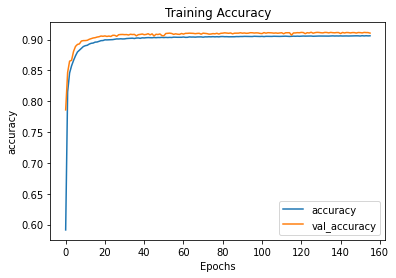

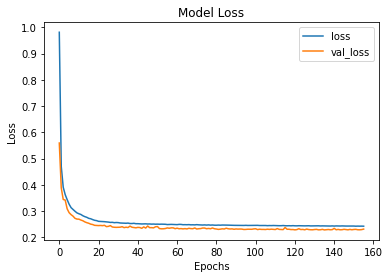

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")